<a href="https://colab.research.google.com/github/robsmokos/Projekt_Zlozony_v3/blob/main/Projekt_Zlozony_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt Złożony podejście_3

Próba pobrania danych bezpośrednio z serwisu SPOTYFY

In [ ]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Konfiguracja aplikacji Spotify
CLIENT_ID = "201745d11caf4fbb893a6d738c491d55"
CLIENT_SECRET = "ac3ca7483a0143bf82582d665d03b293"

# Autoryzacja za pomocą Client Credentials
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [ ]:
# Pobranie utworów wydanych w styczniu 2024
def fetch_tracks_january_2024(year, month, limit=50):
    tracks = []
    for day in range(1, 32):  # Styczeń ma 31 dni
        offset = 0
        query = f"year:{year} month:{month:02d} day:{day:02d}"  # Filtr na rok, miesiąc i dzień
        print(f"\nPobieranie utworów dla daty: {year}-{month:02d}-{day:02d}")

        while True:
            # Pobieranie wyników wyszukiwania
            results = sp.search(q=query, type="track", limit=limit, offset=offset)
            items = results['tracks']['items']
            tracks.extend(items)

            # Wyświetlanie postępu
            print(f"Pobrano {len(items)} wyników (łącznie: {len(tracks)})")

            # Sprawdzenie, czy są kolejne strony wyników
            if len(items) < limit:  # Jeśli mniej wyników niż limit, osiągnięto koniec
                break
            offset += limit  # Przejście do następnej strony

    return tracks

# Wywołanie funkcji dla stycznia 2024
tracks_january_2024 = fetch_tracks_january_2024(2024, 1)

# Wyświetlenie pierwszych 10 wyników
print("\nPierwsze 10 utworów wydanych w styczniu 2024:")
for track in tracks_january_2024[:10]:
    print(f"{track['name']} - {track['artists'][0]['name']}")



Pobieranie utworów dla daty: 2024-01-01
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-02
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-03
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-04
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-05
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-06
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-07
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-08
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-09
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-10
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-11
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-12
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-13
Pobrano 0 wyników (łącznie: 0)

Pobieranie utworów dla daty: 2024-01-14
Pobrano 0 wyników (łącz

# SPRINT 1

1.2 Import danych, analiza stuktury

In [ ]:
# Instalacja wymaganej biblioteki do pobierania danych z Google Drive
!pip install gdown --quiet

# Importowanie wymaganych bibliotek
import gdown
import pandas as pd

# Link do pliku na Google Drive
file_url = "https://drive.google.com/uc?id=14Qa8BLpFOMXUaN4UmnBbwkQV5HTWJ70y"

# Ścieżka zapisu pliku w Colab
output_file = "dane_muzyczne.csv"

# Pobranie pliku z Google Drive
try:
    gdown.download(file_url, output_file, quiet=False)
    print("\nPlik został pobrany pomyślnie!")
except Exception as e:
    print(f"Błąd podczas pobierania pliku: {e}")

# Wczytanie danych z obsługą alternatywnego kodowania
try:
    # Próba wczytania z domyślnym kodowaniem UTF-8
    data = pd.read_csv(output_file)
    print("\nDane zaimportowane pomyślnie z domyślnym kodowaniem (UTF-8)!")
except UnicodeDecodeError as e:
    print(f"\nBłąd kodowania: {e}")
    print("\nPróba odczytu pliku z alternatywnym kodowaniem (ISO-8859-1)...")
    try:
        # Próba wczytania z kodowaniem ISO-8859-1
        data = pd.read_csv(output_file, encoding="ISO-8859-1")
        print("\nDane zaimportowane pomyślnie z kodowaniem ISO-8859-1!")
    except Exception as e:
        print(f"Błąd podczas wczytywania pliku: {e}")
        data = None  # Jeśli wczytanie danych się nie powiedzie

# Jeśli dane zostały poprawnie zaimportowane
if data is not None:
    print("\nPierwsze 5 wierszy danych:")
    print(data.head())  # Podgląd pierwszych wierszy
    print("\n=== Informacje o strukturze danych ===")
    print(data.info())  # Struktura danych
    print("\n=== Podstawowe statystyki opisowe ===")
    print(data.describe())  # Statystyki opisowe
else:
    print("\nNie udało się zaimportować danych.")


Downloading...
From: https://drive.google.com/uc?id=14Qa8BLpFOMXUaN4UmnBbwkQV5HTWJ70y
To: /content/dane_muzyczne.csv
100%|██████████| 106k/106k [00:00<00:00, 20.7MB/s]


Plik został pobrany pomyślnie!

Błąd kodowania: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

Próba odczytu pliku z alternatywnym kodowaniem (ISO-8859-1)...

Dane zaimportowane pomyślnie z kodowaniem ISO-8859-1!

Pierwsze 5 wierszy danych:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30               

In [ ]:
# Analiza struktury bazy danych
def analyze_data_structure(data):
    print("=== ANALIZA STRUKTURY BAZY DANYCH ===\n")

    # Podstawowe informacje o danych
    print("1. Informacje o DataFrame:")
    print(data.info(), "\n")

    # Pierwsze kilka wierszy danych
    print("2. Przykładowe dane (5 pierwszych wierszy):")
    print(data.head(), "\n")

    # Rozmiar danych
    print("3. Liczba wierszy i kolumn:")
    print(f"Wiersze: {data.shape[0]}, Kolumny: {data.shape[1]}\n")

    # Sprawdzenie brakujących wartości
    print("4. Liczba brakujących wartości w każdej kolumnie:")
    print(data.isnull().sum(), "\n")

    # Typy danych w kolumnach
    print("5. Typy danych w kolumnach:")
    print(data.dtypes, "\n")

    # Podstawowe statystyki opisowe dla kolumn numerycznych
    print("6. Statystyki opisowe dla kolumn numerycznych:")
    print(data.describe(), "\n")

    # Unikalne wartości w kolumnach
    print("7. Liczba unikalnych wartości w każdej kolumnie:")
    for col in data.columns:
        print(f"- {col}: {data[col].nunique()} unikalnych wartości")

    # Wywołanie funkcji analizy
analyze_data_structure(data)

=== ANALIZA STRUKTURY BAZY DANYCH ===

1. Informacje o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   95

1.3 uzupełnienie brakujących danych

In [ ]:
# Konwersja kolumny `in_shazam_charts` do typu liczbowego (z obsługą błędów)
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

# Naprawa kolumny `in_shazam_charts` - wypełnienie średnią wartością
data['in_shazam_charts'].fillna(data['in_shazam_charts'].mean(), inplace=True)

# Naprawa kolumny `key` - wypełnienie najczęściej występującą wartością
data['key'].fillna(data['key'].mode()[0], inplace=True)

# Sprawdzenie braków po naprawie
print("\n=== Liczba brakujących wartości po naprawie ===")
print(data[['in_shazam_charts', 'key']].isnull().sum())

# Zapisanie naprawionego pliku (opcjonalne)
output_file = "spotify_2023_cleaned.csv"
data.to_csv(output_file, index=False)
print(f"\nNaprawione dane zapisano w pliku: {output_file}")



=== Liczba brakujących wartości po naprawie ===
in_shazam_charts    0
key                 0
dtype: int64

Naprawione dane zapisano w pliku: spotify_2023_cleaned.csv


<ipython-input-11-d314d6cb4e4f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['in_shazam_charts'].fillna(data['in_shazam_charts'].mean(), inplace=True)
<ipython-input-11-d314d6cb4e4f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

1.4 Analiza rozkładu zmiennych

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Analiza rozkładu zmiennych numerycznych:


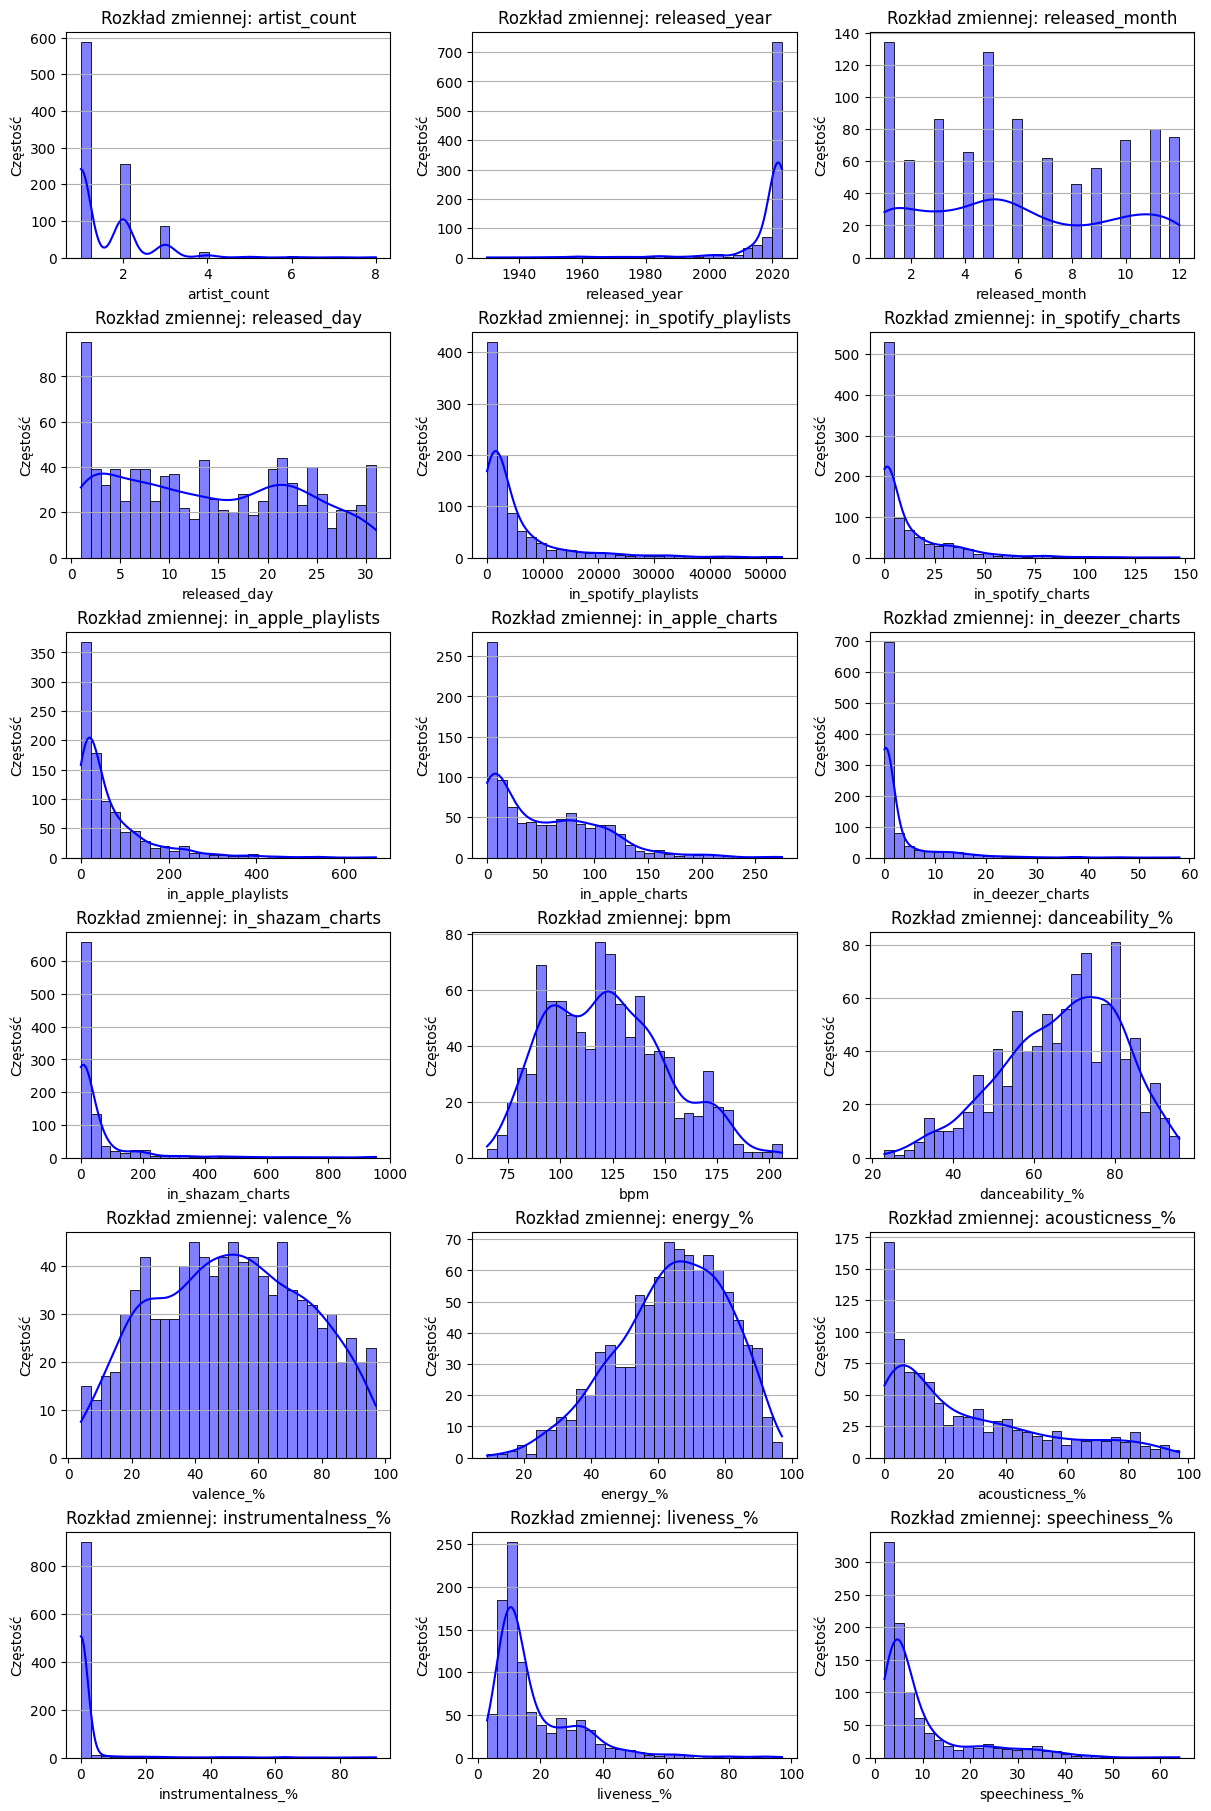


Analiza rozkładu zmiennych kategorycznych:


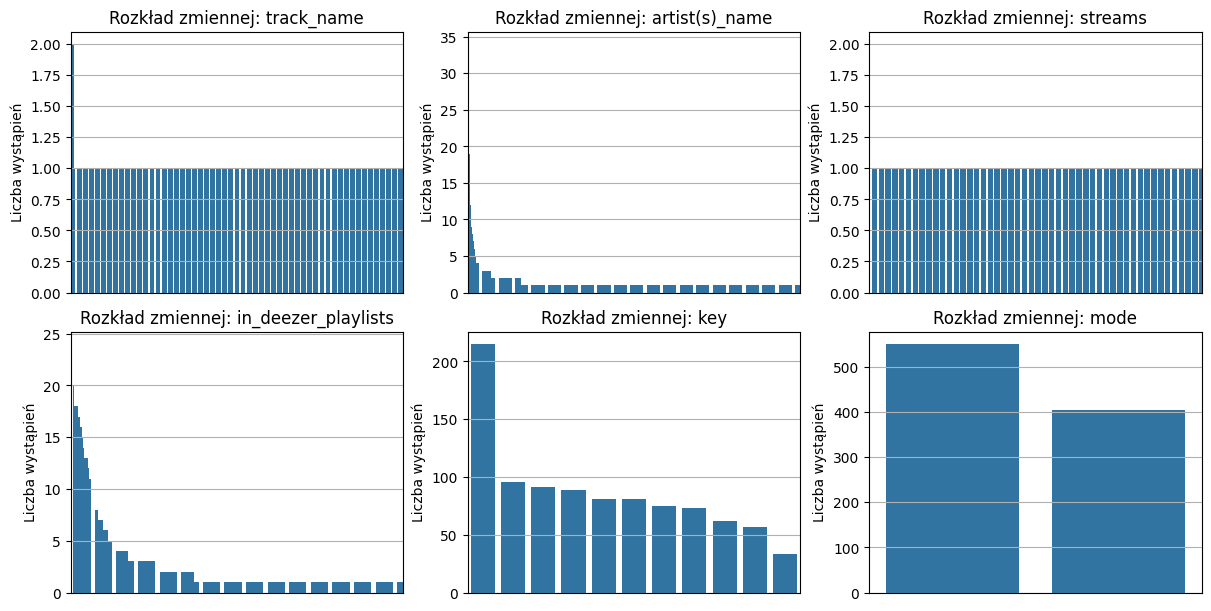

In [19]:
# Funkcja do analizy rozkładu zmiennych numerycznych
def analyze_numeric_distribution(df, columns):
    n_cols = 3  # Liczba wykresów w jednym rzędzie
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Obliczanie liczby rzędów
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), constrained_layout=True)

    for i, col in enumerate(columns):
        row, col_idx = divmod(i, n_cols)
        ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
        sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
        ax.set_title(f"Rozkład zmiennej: {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Częstość")
        ax.grid(axis='y')

    # Wyłączanie pustych osi w przypadku brakujących zmiennych
    for i in range(len(columns), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        fig.delaxes(axes[row, col_idx] if n_rows > 1 else axes[col_idx])

    plt.show()

# Funkcja do analizy zmiennych kategorycznych
def analyze_categorical_distribution(df, columns):
    n_cols = 3  # Liczba wykresów w jednym rzędzie
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Obliczanie liczby rzędów
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), constrained_layout=True)

    for i, col in enumerate(columns):
      row, col_idx = divmod(i, n_cols)
      ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
      sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
      ax.set_title(f"Rozkład zmiennej: {col}")
      ax.set_ylabel("Liczba wystąpień")
      ax.set_xlabel("")  # Usunięcie opisu osi x
      ax.set_xticks([])  # Usunięcie wartości osi x
      ax.grid(axis='y')

    # Wyłączanie pustych osi w przypadku brakujących zmiennych
    for i in range(len(columns), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        fig.delaxes(axes[row, col_idx] if n_rows > 1 else axes[col_idx])

    plt.show()

# Wybór zmiennych numerycznych i kategorycznych
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Analiza rozkładu zmiennych numerycznych
print("\nAnaliza rozkładu zmiennych numerycznych:")
analyze_numeric_distribution(data, numeric_columns)

# Analiza rozkładu zmiennych kategorycznych
print("\nAnaliza rozkładu zmiennych kategorycznych:")
analyze_categorical_distribution(data, categorical_columns)